In [1]:
import statistics as st
import numpy as np
import scipy
import matplotlib.pyplot as plt
import pandas as pd

#                    A) DECSRIPTIVE STATISTICS         

# 1) Central Tendency

In [2]:
data=[2,4,7,10,20,23,4,2,2,4,7,10,7,42,2,4,7,10,20,23,4,2,2,4,7,10,7,42,2,4,7,10,20,23,4,2,2,4,7,10,7,42]

In [3]:
print("Mean",st.mean(data))

Mean 10.285714285714286


In [4]:
print("Median",st.median(data))

Median 7.0


In [5]:
print("Mode",st.mode(data))

Mode 2


In [6]:
print("Max",max(data))

Max 42


In [7]:
print("Min",min(data))

Min 2


In [8]:
x = [8.0, 1, 2.5, 4, 28.0]
w = [0.1, 0.2, 0.3, 0.25, 0.15]
wmean = np.average(x, weights=w)
print("Weighted mean=",wmean)

Weighted mean= 6.95


In [9]:
hmean = st.harmonic_mean(x)
print("Harmonic mean=",hmean)

Harmonic mean= 2.7613412228796843


In [10]:
gmean = st.geometric_mean(x)
print("Geometric mean=",gmean)

Geometric mean= 4.67788567485604


In [11]:
print("Multi mode")
v = [12, 15, 12, 15, 21, 15, 12]
st.mode(v)  # Raises StatisticsError
st.multimode(v)

Multi mode


[12, 15]

# 2) Dispersion

In [12]:
print("Range",max(data)-min(data))

Range 40


In [13]:
print("Variance",st.variance(data))

Variance 118.45296167247388


In [14]:
print("Standard Deviation ",st.stdev(data))

Standard Deviation  10.883609772151603


In [15]:
print("Population variance ",st.pvariance(data))

Population variance  115.6326530612245


In [16]:
from scipy import stats

In [17]:
print("0th moment",stats.moment(data,moment=0))
print("2th moment",stats.moment(data,moment=2))

0th moment 1.0
2th moment 115.6326530612245


In [18]:
stats.normaltest(data)

NormaltestResult(statistic=24.656165648580615, pvalue=4.425696794177774e-06)

# 3) Skewness 
function test whether the skew is different from the normal distribution. This function tests the null hypothesis that the skewness of the population that the sample was drawn from is the same as that of a corresponding normal distribution.

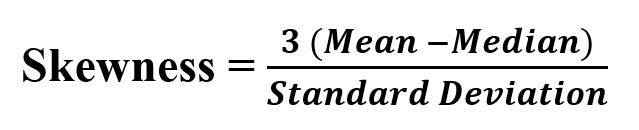

In [19]:
print("Skewtest",stats.skewtest(data))

Skewtest SkewtestResult(statistic=4.170252001014954, pvalue=3.042630014380147e-05)


# 4) Kurtosis 
It is the fourth central moment divided by the square of the variance. It is a measure of the “tailedness” i.e. descriptor of shape of probability distribution of a real-valued random variable. In simple terms, one can say it is a measure of how heavy tail is compared to a normal distribution.

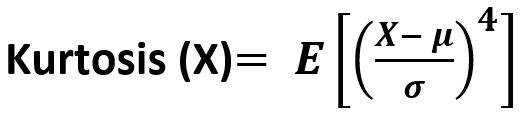

In [20]:
stats.kurtosis(data)

2.6937831435246604

In [21]:
stats.kurtosistest(data)

KurtosistestResult(statistic=2.695396797618374, pvalue=0.007030485283768377)

In [22]:
stats.itemfreq(data)

C:\Users\user\AppData\Local\Temp\ipykernel_9516\1358659330.py:1: DeprecationWarning: `itemfreq` is deprecated!
`itemfreq` is deprecated and will be removed in a future version. Use instead `np.unique(..., return_counts=True)`
  stats.itemfreq(data)


array([[ 2,  9],
       [ 4,  9],
       [ 7,  9],
       [10,  6],
       [20,  3],
       [23,  3],
       [42,  3]], dtype=int64)

In [23]:
np.unique(data,return_counts=True)

(array([ 2,  4,  7, 10, 20, 23, 42]),
 array([9, 9, 9, 6, 3, 3, 3], dtype=int64))

# 5) Percentiles

The sample 𝑝 percentile is the element in the dataset such that 𝑝% of the elements in the dataset are less than or equal to that value. Also, (100 − 𝑝)% of the elements are greater than or equal to that value. If there are two such elements in the dataset, then the sample 𝑝 percentile is their arithmetic mean. Each dataset has three quartiles, which are the percentiles that divide the dataset into four parts:
# quantiles
If you want to divide your data into several intervals, then you can use statistics.quantiles():

In [24]:
x = [-5.0, -1.1, 0.1, 2.0, 8.0, 12.8, 21.0, 25.8, 41.0]
st.quantiles(x, n=2)

[8.0]

In [25]:
st.quantiles(x, n=4, method='inclusive')

[0.1, 8.0, 21.0]

You can also use np.percentile() to determine any sample percentile in your dataset. For example, this is how you can find the 5th and 95th percentiles:

In [26]:
y = np.array(x)
np.percentile(y, 5)

-3.44

In [27]:
np.percentile(y, 95)
34.919999999999995

34.919999999999995

In [28]:
print("Range=",np.ptp(x))

Range= 46.0


In [29]:
quar = np.quantile(y, [0.25, 0.75])
iqr=(quar[1]-quar[0])
print(iqr)

20.9


# 6) Covariance

In [30]:
x=np.array([3,4,6,8])
y=np.array([5,14,25,56])

In [31]:
covm=np.cov(x,y)

In [32]:
covm

array([[  4.91666667,  48.        ],
       [ 48.        , 494.        ]])

In [33]:
y.var(ddof=1)

494.0

In [34]:
x.var(ddof=1)

4.916666666666667

# 7) Coorelation Coefficient

corr(x,y)=cov(x,y)/(std(x)std(y))

In [35]:
sigx=np.std(x,ddof=1)
sigx

2.217355782608345

In [36]:
sigy=np.std(y,ddof=1)
sigy

22.22611077089287

In [37]:
covxy=covm[1,0]

In [38]:
r=covxy/(sigx*sigy)
r

0.9739628237087135

# Pearson coorelarion coeficient

In [39]:
r, p = scipy.stats.pearsonr(x, y)
r,p

(0.9739628237087137, 0.026037176291286324)

# 8) Working With 2D Data

# axis=None 
says to calculate the statistics across all data in the array. This behavior is often the default in NumPy.
# axis=0 
says to calculate the statistics across all rows, that is, for each column of the array. T
# axis=1 
says to calculate the statistics across all columns

In [40]:
 mat = np.array([[1, 1, 1],[2, 3, 1],[4, 9, 2],[8, 27, 4],[16, 1, 1]])

In [41]:
mat

array([[ 1,  1,  1],
       [ 2,  3,  1],
       [ 4,  9,  2],
       [ 8, 27,  4],
       [16,  1,  1]])

In [42]:
np.mean(mat)

5.4

In [43]:
#For each column calculate
np.mean(mat,axis=0)

array([6.2, 8.2, 1.8])

In [44]:
np.mean(mat,axis=1)

array([ 1.,  2.,  5., 13.,  6.])

In [45]:
np.var(mat,axis=0,ddof=1)

array([ 37.2, 121.2,   1.7])

In [46]:
stats.gmean(mat,axis=0)

array([4.        , 3.73719282, 1.51571657])

# 9) Dataframes

In [47]:
row_names = ['first', 'second', 'third', 'fourth', 'fifth']
>>> col_names = ['A', 'B', 'C']
>>> df = pd.DataFrame(mat, index=row_names, columns=col_names)

In [48]:
df

,A,B,C
first,1,1,1
second,2,3,1
third,4,9,2
fourth,8,27,4
fifth,16,1,1


In [49]:
df.mean()

A    6.2
B    8.2
C    1.8
dtype: float64

In [50]:
df.mean()['A']

6.2

In [51]:
df['A'].mean()

6.2

In [52]:
df.mean(axis=1)

first      1.0
second     2.0
third      5.0
fourth    13.0
fifth      6.0
dtype: float64

In [53]:
df.values

array([[ 1,  1,  1],
       [ 2,  3,  1],
       [ 4,  9,  2],
       [ 8, 27,  4],
       [16,  1,  1]])

# 10) Histogram

In [54]:
sdata=sorted(data)

In [55]:
hist,binsize=scipy.histogram(sdata,bins=range(43))

C:\Users\user\AppData\Local\Temp\ipykernel_9516\3974581403.py:1: DeprecationWarning: scipy.histogram is deprecated and will be removed in SciPy 2.0.0, use numpy.histogram instead
  hist,binsize=scipy.histogram(sdata,bins=range(43))


In [56]:
binsize

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42])

In [57]:
hist

array([0, 0, 9, 0, 9, 0, 0, 9, 0, 0, 6, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0,
       0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3],
      dtype=int64)

In [58]:
binsize.shape

(43,)

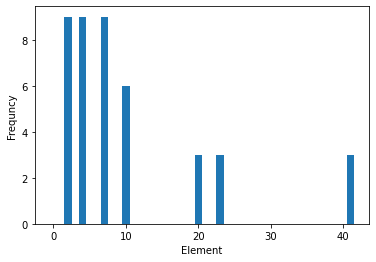

In [59]:
plt.bar(binsize[:-1],hist,width=1)
plt.xlabel('Element')
plt.ylabel('Frequncy')
plt.show()

# 11)Standard error of mean

In [60]:
stats.sem(data,ddof=0)

1.6592644172101176

# 12)Z score

In [61]:
stats.zscore(data)

array([-0.77053028, -0.58454021, -0.30555511, -0.02657001,  0.90338032,
        1.18236543, -0.58454021, -0.77053028, -0.77053028, -0.58454021,
       -0.30555511, -0.02657001, -0.30555511,  2.94927106, -0.77053028,
       -0.58454021, -0.30555511, -0.02657001,  0.90338032,  1.18236543,
       -0.58454021, -0.77053028, -0.77053028, -0.58454021, -0.30555511,
       -0.02657001, -0.30555511,  2.94927106, -0.77053028, -0.58454021,
       -0.30555511, -0.02657001,  0.90338032,  1.18236543, -0.58454021,
       -0.77053028, -0.77053028, -0.58454021, -0.30555511, -0.02657001,
       -0.30555511,  2.94927106])

# Descriptive statistics

In [62]:
stats.describe(data)

DescribeResult(nobs=42, minmax=(2, 42), mean=10.285714285714286, variance=118.45296167247389, skewness=1.8561632353791857, kurtosis=2.6937831435246604)

# 13) Visualizatoin

how to present your data visually using the following graphs:

a) Box plots
b)Histograms
c) Pie charts
d) Bar charts
e)X-Y plots
f)Heatmaps

# a) Boxplot

It can show the range, interquartile range, median, mode, outliers, and all quartiles

In [63]:
np.random.seed(seed=0)
x = np.random.randn(1000)
y = np.random.randn(100)
z = np.random.randn(10)

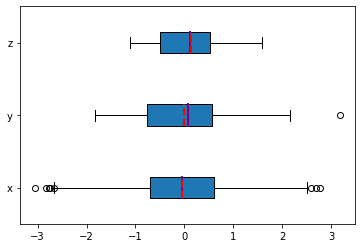

In [64]:
fig, ax = plt.subplots()
ax.boxplot((x, y, z), vert=False, showmeans=True, meanline=True,
           labels=('x', 'y', 'z'), patch_artist=True,
           medianprops={'linewidth': 2, 'color': 'purple'},
           meanprops={'linewidth': 2, 'color': 'red'})
plt.show()

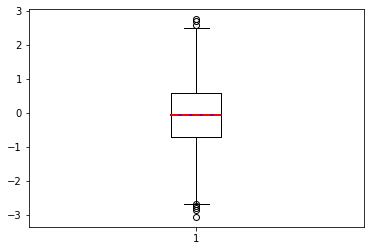

In [65]:
plt.boxplot(x, showmeans=True, meanline=True, medianprops={'linewidth': 2, 'color': 'purple'},meanprops={'linewidth': 2, 'color': 'red'})
plt.show()

# 8)t Distribution
a (degrees of freedom) and b (location parameter). rv is then used for generating five(size=5) random values. 

where,
t = The t-score,
x̄ = sample mean,
μ = population mean,
s = standard deviation of the sample,
n = sample size 

In [66]:
from scipy.stats import t

In [67]:
a, b = 4, 3
rv = t(a, b)

In [68]:
random_values = rv.rvs(size=5)  
 
print("Random Values: ", random_values)

Random Values:  [2.95543708 2.79372853 4.57362644 2.92501411 3.54911862]


# 9) Normal Distribution

The normal distribution is a continuous probability distribution function also known as Gaussian distribution which is symmetric about its mean and has a bell-shaped curve. It is one of the most used probability distributions. Two parameters characterize it

Mean(μ)- It represents the center of the distribution 
Standard Deviation(σ) – It represents the spread in the curve 

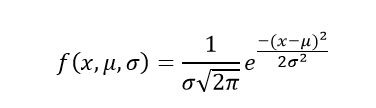

# Properties Of Normal Distribution
# a) Symmetric distribution – 
The normal distribution is symmetric about its mean point. It means the distribution is perfectly balanced toward its mean point with half of the data on either side. 
# b)Bell-Shaped curve – 
The graph of a normal distribution takes the form bell-shaped curve with most of the points accumulated at its mean position. The shape of this curve is determined by the mean and standard deviation of the distribution 
# c) Empirical Rule – 
The normal distribution curve follows the empirical rule where 68% of the data lies within 1 standard deviation from the mean of the graph, 95% of the data lies within 2 standard deviations from the mean and 99.7% of the data lies within 3 standard deviations from the mean.
# d)Additive Rule – 
The sum of two or more normal distributions will always be a normal distribution. 
# e)Central Limit Theoram – 
It states if we take the mean of large no data points collected from independent and identical distributed random variables then these mean will follow a normal distribution regardless of their original distribution.

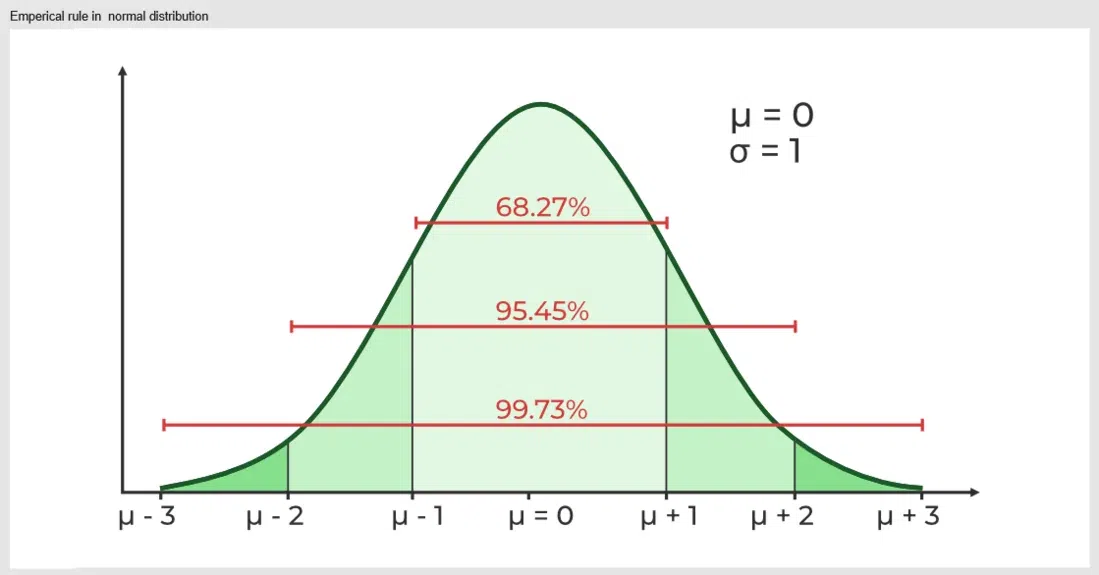

# 9.1)Method-1

In [69]:
import numpy as np

def normal_dist(x, mean, sd):
    prob_density = (np.pi*sd) * np.exp(-0.5*((x-mean)/sd)**2)
    return prob_density

mean = 0
sd = 1
x = 1
result = normal_dist(x, mean, sd)
print(result)

1.9054722647301798


# 9.2) Method-2

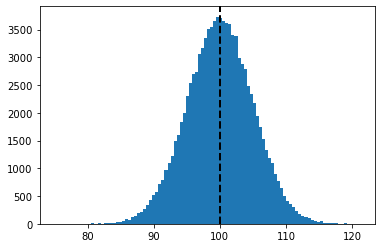

In [70]:
import numpy as np
import matplotlib.pyplot as plt
 
# Mean of the distribution 
Mean = 100

# satndard deviation of the distribution
Standard_deviation  = 5
 
# size
size = 100000
 
# creating a normal distribution data
values = np.random.normal(Mean, Standard_deviation, size)
 
# plotting histograph
plt.hist(values, 100)
# plotting mean line
plt.axvline(values.mean(), color='k', linestyle='dashed', linewidth=2)
plt.show()

# 9.3) Numerical

Suppose there are 100 students in the class and in one of the mathematics tests the average marks scored by the students in the subject is 78 and the standard deviation is 25. The marks of the student follow Normal probability distribution. We can use this information to answer some questions about the student’s marks

In [71]:
# import required libraries
from scipy.stats import norm
import numpy as np

# Given information
mean = 78
std_dev = 25
total_students = 100
score = 60

# Calculate z-score for 60
z_score = (score - mean) / std_dev

# Calculate the probability of getting a score less than 60
prob = norm.cdf(z_score)

# Calculate the percentage of students who got less than 60 marks
percent = prob * 100

# Print the result
print("Percentage of students who got less than 60 marks:", round(percent, 2), "%")
percent = (1-prob) * 100

# Print the result
print("Percentage of students who got more than 60 marks: ", round(percent, 2), " %")

Percentage of students who got less than 60 marks: 23.58 %
Percentage of students who got more than 60 marks:  76.42  %


# 9.4)Numerical 2
Percentage of Students who have scored More than 75 and less than 85

In [72]:
# Given information
mean = 78
std_dev = 25
total_students = 100
min_score = 75
max_score = 85

# Calculate z-score for 75
z_min_score = (min_score - mean) / std_dev
# Calculate z-score for 85
z_max_score = (max_score - mean) / std_dev


# Calculate the probability of getting less than 70
min_prob = norm.cdf(z_min_score)

# Calculate the probability of getting  less than 85
max_prob = norm.cdf(z_max_score)

percent = (max_prob-min_prob) * 100

# Print the result
print("Percentage of students who got marks between 75 and 85 is", round(percent, 2), "%")

Percentage of students who got marks between 75 and 85 is 15.8 %
